## **IMPORTING NECESSARY MODULES**

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
#!pip install rpy2

## **IMPORTING DATA**

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [4]:
print('the size of the dataset', data.shape)
print('the columns of the dataset ', list(data.columns))

the size of the dataset (2938, 22)
the columns of the dataset  ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [5]:
data.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [6]:
print('Number of Countries', len(data['Country'].unique()))

Number of Countries 193


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [8]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [9]:
#Count of developing and developed countries
data.groupby('Status')["Status"].count()

Status
Developed      512
Developing    2426
Name: Status, dtype: int64

In [10]:
data.loc[:, ["Life_Expectancy", "Alcohol"]].groupby(data['Country']).describe().loc[['Morocco','Germany','France','Spain'],:]

Life_Expectancy                                                   \
                  count      mean       std   min     25%    50%     75%   
Country                                                                    
Morocco            16.0  72.15625  2.243797  68.6  70.725  72.15  73.675   
Germany            16.0  81.17500  3.379053  78.0  78.950  79.85  82.000   
France             16.0  82.21875  3.166958  78.8  80.575  81.60  82.250   
Spain              16.0  82.06875  2.792065  79.1  80.625  81.75  82.450   

              Alcohol                                                           
          max   count       mean       std    min    25%    50%     75%    max  
Country                                                                         
Morocco  77.0    15.0   0.518667  0.060340   0.43   0.46   0.54   0.560   0.62  
Germany  89.0    15.0  11.628667  0.568241  10.94  11.20  11.50  11.875  12.91  
France   89.0    15.0  12.404667  0.936695  11.10  11.75  12.20  13.335  13.89  
Spain    89.0    15.0  10.024000  2.974496   0.01   9.70  10.24  11.890  12.26

## **DATA VISUALIZATION**

<AxesSubplot:>

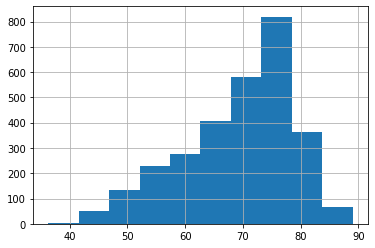

In [11]:
#Distribution of the response variable
data['Life_Expectancy'].hist()

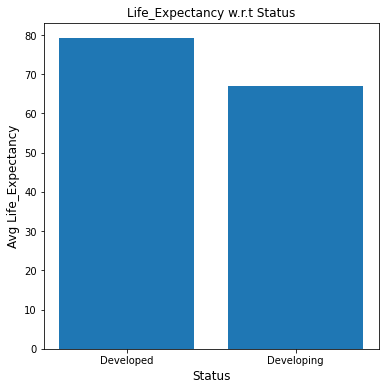

In [12]:
plt.figure(figsize=(6,6))
plt.bar(data.groupby('Status')['Status'].count().index, data.groupby('Status')['Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

<AxesSubplot:title={'center':'Life_Expectancy'}, xlabel='Country'>

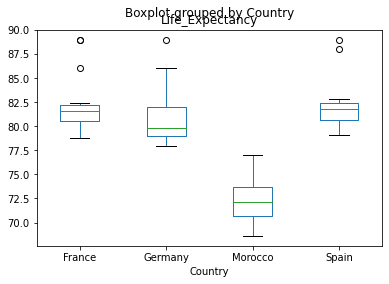

In [13]:
data[data.Country.isin(['Morocco','Germany','Spain','France'])].boxplot(by='Country', 
                       column=['Life_Expectancy'], 
                       grid=False)

<AxesSubplot:ylabel='Country'>

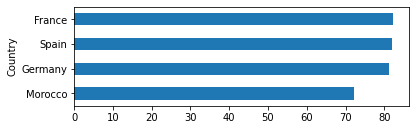

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
data[data.Country.isin(['Morocco','Germany','Spain','France'])].groupby('Country')['Life_Expectancy'].mean().sort_values().plot(kind='barh', ax=ax1)

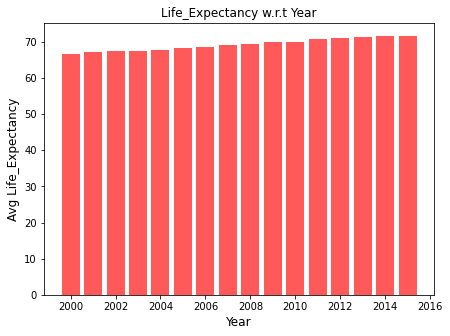

In [15]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(data.groupby('Year')['Year'].count().index, data.groupby('Year')['Life_Expectancy'].mean(),color='red',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

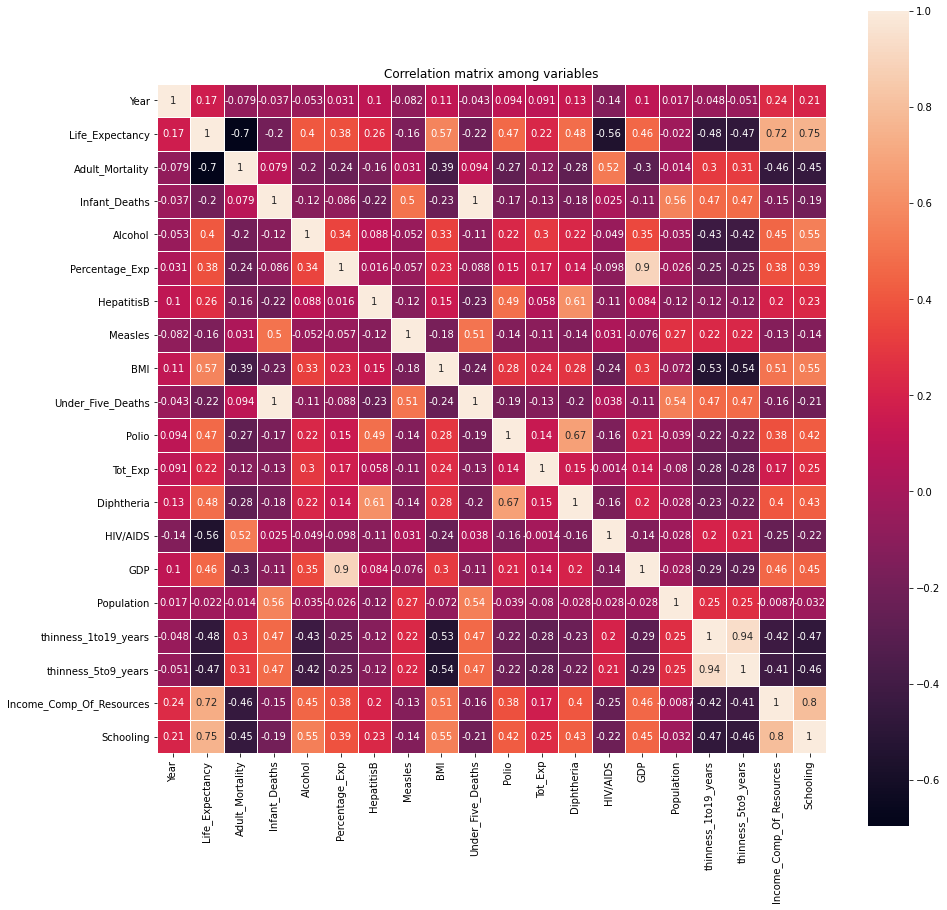

In [16]:
# Using heatmap to observe correlations.
cormat = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among variables")
plt.show()

# **Observation**
* **LifeExpectancy has a negative correlation with adult mortality** 
* **LifeExpectancy has strong correlatios with Schooling and Income composition of resources** 
* **Strong correlation between thinness_1to19_years and thinness_5to9_years** 
* **There is a non-negligible correlation between LifeExpectancy and BMI and body deseases** 

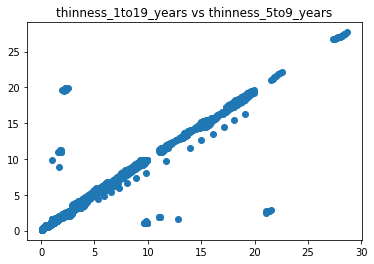

In [17]:
plt.scatter(data["thinness_5to9_years"], data["thinness_1to19_years"])
plt.title("thinness_1to19_years vs thinness_5to9_years")
plt.show()

In [18]:
#Strong correlation between "thinness_1to19_years" and "thinness_5to9_years"
data = data.drop(['thinness_5to9_years'], axis=1)

## **DEALING WITH MISSING DATA**

In [19]:
data.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

In [20]:
# percentage of null values in each column.
data.isnull().sum()*100/data.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [21]:
country_list = data.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB',
             'BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','Income_Comp_Of_Resources','Schooling']

In [22]:
# Treat null values using interpolation.
for country in country_list:
    data.loc[data['Country'] == country,fill_list] = data.loc[data['Country'] == country,fill_list].interpolate()

In [23]:
#Droping rows with null target variable
data[np.isnan(data['Life_Expectancy'])]
data = data.drop(data.index[[624, 769, 1650,1715,1812,1909,1958,2167,2216,2713]])

In [24]:
def impute_col(row, col): #MCAR
    mean_col = pd.DataFrame({'mean_col':pd.Series(np.round(data.groupby('Country')[col].mean(), 2))})
    if np.isnan(row[col]):
        cnt = row['Country']
        row[col] = mean_col.loc[cnt][0]
    return row

In [25]:
# Alcohol null values
data[np.isnan(data.Alcohol)]

Country  Year      Status  Life_Expectancy  \
32                               Algeria  2015  Developing             75.6   
48                                Angola  2015  Developing             52.4   
64                   Antigua and Barbuda  2015  Developing             76.4   
80                             Argentina  2015  Developing             76.3   
96                               Armenia  2015  Developing             74.8   
...                                  ...   ...         ...              ...   
2858  Venezuela (Bolivarian Republic of)  2015  Developing             74.1   
2874                            Viet Nam  2015  Developing             76.0   
2890                               Yemen  2015  Developing             65.7   
2906                              Zambia  2015  Developing             61.8   
2922                            Zimbabwe  2015  Developing             67.0   

      Adult_Mortality  Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  \
32               19.0             21      NaN             0.0        95.0   
48              335.0             66      NaN             0.0        64.0   
64               13.0              0      NaN             0.0        99.0   
80              116.0              8      NaN             0.0        94.0   
96              118.0              1      NaN             0.0        94.0   
...               ...            ...      ...             ...         ...   
2858            157.0              9      NaN             0.0        87.0   
2874            127.0             28      NaN             0.0        97.0   
2890            224.0             37      NaN             0.0        69.0   
2906             33.0             27      NaN             0.0         9.0   
2922            336.0             22      NaN             0.0        87.0   

      Measles   BMI  Under_Five_Deaths  Polio  Tot_Exp  Diphtheria  HIV/AIDS  \
32         63  59.5                 24   95.0      NaN        95.0       0.1   
48        118  23.3                 98    7.0      NaN        64.0       1.9   
64          0  47.7                  0   86.0      NaN        99.0       0.2   
80          0  62.8                  9   93.0      NaN        94.0       0.1   
96         33  54.9                  1   96.0      NaN        94.0       0.1   
...       ...   ...                ...    ...      ...         ...       ...   
2858        0  62.1                 10   87.0      NaN        87.0       0.1   
2874      256  17.5                 35   97.0      NaN        97.0       0.1   
2890      468  41.3                 47   63.0      NaN        69.0       0.1   
2906        9  23.4                 40    9.0      NaN         9.0       4.1   
2922        0  31.8                 32   88.0      NaN        87.0       6.2   

               GDP  Population  thinness_1to19_years  \
32     4132.762920  39871528.0                   6.0   
48     3695.793748   2785935.0                   8.3   
64    13566.954100         NaN                   3.3   
80    13467.123600  43417765.0                   1.0   
96      369.654776    291695.0                   2.1   
...            ...         ...                   ...   
2858           NaN         NaN                   1.6   
2874           NaN         NaN                  14.2   
2890           NaN         NaN                  13.6   
2906   1313.889646    161587.0                   6.3   
2922    118.693830  15777451.0                   5.6   

      Income_Comp_Of_Resources  Schooling  
32                       0.743       14.4  
48                       0.531       11.4  
64                       0.784       13.9  
80                       0.826       17.3  
96                       0.741       12.7  
...                        ...        ...  
2858                     0.769       14.3  
2874                     0.678       12.6  
2890                     0.499        9.0  
2906                     0.576       12.5  
2922                     0.507       10.3

In [26]:
data = data.apply(impute_col, args=('Alcohol',) , axis=1)
data = data[data.Country != 'South Sudan']

In [27]:
# Hepatitis B null values
data[np.isnan(data['HepatitisB'])]

Country  Year     Status  \
737                                             Denmark  2015  Developed   
738                                             Denmark  2014  Developed   
739                                             Denmark  2013  Developed   
740                                             Denmark  2012  Developed   
741                                             Denmark  2011  Developed   
...                                                 ...   ...        ...   
2773  United Kingdom of Great Britain and Northern I...  2004  Developed   
2774  United Kingdom of Great Britain and Northern I...  2003  Developed   
2775  United Kingdom of Great Britain and Northern I...  2002  Developed   
2776  United Kingdom of Great Britain and Northern I...  2001  Developed   
2777  United Kingdom of Great Britain and Northern I...  2000  Developed   

      Life_Expectancy  Adult_Mortality  Infant_Deaths  Alcohol  \
737              86.0             71.0              0    10.71   
738              84.0             73.0              0     9.64   
739              81.0             75.0              0     9.50   
740              80.0             76.0              0     9.26   
741              79.7             79.0              0    10.47   
...               ...              ...            ...      ...   
2773             78.8             83.0              4    12.22   
2774             78.3             86.0              4    11.85   
2775             78.2             87.0              4    11.44   
2776             78.0             88.0              4    10.91   
2777             77.8             89.0              4    10.59   

      Percentage_Exp  HepatitisB  Measles   BMI  Under_Five_Deaths  Polio  \
737         0.000000         NaN        9  58.8                  0   93.0   
738     10468.762920         NaN       27  58.4                  0   94.0   
739     10261.763000         NaN       17  58.1                  0   94.0   
740       928.417079         NaN        2  57.7                  0   94.0   
741     10251.108720         NaN       84  57.4                  0   91.0   
...              ...         ...      ...   ...                ...    ...   
2773        0.000000         NaN      189   6.1                  4   92.0   
2774        0.000000         NaN      460  59.5                  4   91.0   
2775        0.000000         NaN      314  58.8                  4   91.0   
2776        0.000000         NaN       73  58.2                  4   91.0   
2777        0.000000         NaN      104  57.5                  5   91.0   

      Tot_Exp  Diphtheria  HIV/AIDS          GDP  Population  \
737       NaN        93.0       0.1   5314.64416   5683483.0   
738      1.80        94.0       0.1  62425.53920   5643475.0   
739     11.25        94.0       0.1  61191.19263   5614932.0   
740      1.98        94.0       0.1   5857.52100   5591572.0   
741      1.87        91.0       0.1  61753.66700    557572.0   
...       ...         ...       ...          ...         ...   
2773     7.98        92.0       0.1          NaN         NaN   
2774     7.81        91.0       0.1          NaN         NaN   
2775     7.57        91.0       0.1          NaN         NaN   
2776     7.31        91.0       0.1          NaN         NaN   
2777     6.94        91.0       0.1          NaN         NaN   

      thinness_1to19_years  Income_Comp_Of_Resources  Schooling  
737                    1.1                     0.923       19.2  
738                    1.1                     0.926       19.2  
739                    1.1                     0.924       18.7  
740                    1.1                     0.922       18.4  
741                    1.1                     0.910       16.9  
...                    ...                       ...        ...  
2773                   0.7                       NaN        NaN  
2774                   0.7                       NaN        NaN  
2775                   0.7                       NaN  

In [28]:
data = data.drop(['HepatitisB'], axis=1)

In [29]:
#BMI null values
data[np.isnan(data['BMI'])]

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
2457   Sudan  2015  Developing             64.1            225.0   
2458   Sudan  2014  Developing             63.8            229.0   
2459   Sudan  2013  Developing             63.5            232.0   
2460   Sudan  2012  Developing             63.2            235.0   
2461   Sudan  2011  Developing             62.7            241.0   
2462   Sudan  2010  Developing             62.5            243.0   
2463   Sudan  2009  Developing             62.0            248.0   
2464   Sudan  2008  Developing             61.8            251.0   
2465   Sudan  2007  Developing             61.4            254.0   
2466   Sudan  2006  Developing             61.0             26.0   
2467   Sudan  2005  Developing             67.0            261.0   
2468   Sudan  2004  Developing             59.7            278.0   
2469   Sudan  2003  Developing             59.6            278.0   
2470   Sudan  2002  Developing             59.4            277.0   
2471   Sudan  2001  Developing             58.9            283.0   
2472   Sudan  2000  Developing             58.6            284.0   

      Infant_Deaths  Alcohol  Percentage_Exp  Measles  BMI  Under_Five_Deaths  \
2457             58     1.46        0.000000     3585  NaN                 85   
2458             59     0.01      253.608651      676  NaN                 86   
2459             60     0.01      227.835321     2813  NaN                 88   
2460             61     0.01      220.522192     8523  NaN                 89   
2461             61     2.12      196.689215     5616  NaN                 91   
2462             62     1.77      172.009788      680  NaN                 92   
2463             63     1.99       17.053693       68  NaN                 94   
2464             64     2.01      128.636271      129  NaN                 95   
2465             65     2.01       86.131669      327  NaN                 97   
2466             66     1.90       60.336857      228  NaN                 99   
2467             66     1.55       37.590396     1374  NaN                101   
2468             68     1.59       37.044800     9562  NaN                102   
2469             69     1.74       35.352647     4381  NaN                104   
2470             70     1.59       30.622875     4529  NaN                106   
2471             71     1.81       28.880697     4362  NaN                108   
2472             71     1.76       30.860010     2875  NaN                109   

      Polio  Tot_Exp  Diphtheria  HIV/AIDS          GDP  Population  \
2457   93.0      NaN        93.0       0.3  2513.884661   3864783.0   
2458   94.0     8.43        94.0       0.3  2176.898290  37737913.0   
2459   93.0     8.42        93.0       0.3  1955.667990  36849918.0   
2460   92.0     8.20        92.0       0.3  1892.894352   3599192.0   
2461   93.0     8.30        93.0       0.3  1666.857757  35167314.0   
2462    9.0     7.97         9.0       0.3  1476.478870  34385963.0   
2463   81.0     8.40        81.0       0.3  1226.884381   3365619.0   
2464   85.0     8.17        86.0       0.3  1291.528826  32955496.0   
2465   84.0     4.72        84.0       0.3  1115.695200  32282526.0   
2466   77.0     3.93        78.0       0.2   893.879364    316764.0   
2467   78.0     3.18        78.0       0.2   679.753995   3911914.0   
2468   74.0     3.39        74.0       0.2   565.569459   3186341.0   
2469   69.0     3.18        69.0       0.2   477.738478  29435944.0   
2470    6.0     2.95         6.0       0.2   412.151756  28679565.0   
2471   66.0     2.96        66.0       0.2   377.525445    279455.0   
2472   62.0     3.23        62.0       0.1   361.358430   2725535.0   

      thinness_1to19_years  Income_Comp_Of_Resources  Schooling  
2457                   NaN                     0.488        7.2  
2458                   NaN                     0.485        7.2  
2459                   NaN                     0.478        7.0 

In [30]:
data = data[data.Country != 'Sudan']

In [31]:
#Total expenditure null values
data = data.apply(impute_col, args=('Tot_Exp',) , axis=1)

In [32]:
data = data[~data['Country'].isin(["Democratic People's Republic of Korea","Somalia"])]

In [33]:
#GDP null values
data = data.apply(impute_col, args=('GDP',) , axis=1)

In [34]:
data = data.drop(['GDP'], axis=1)

In [35]:
#Population null values
data = data.apply(impute_col, args=('Population',) , axis=1)

In [36]:
data[np.isnan(data.Population)]['Country'].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Brunei Darussalam',
       "Côte d'Ivoire", 'Congo', 'Cuba', 'Czechia',
       'Democratic Republic of the Congo', 'Egypt', 'Gambia', 'Grenada',
       'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya',
       'Micronesia (Federated States of)', 'New Zealand', 'Oman', 'Qatar',
       'Republic of Korea', 'Republic of Moldova', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'The former Yugoslav republic of Macedonia',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype=object)

In [37]:
data = data.drop(['Population'], axis=1)

In [38]:
#Income_Comp_Of_Resources
data = data.apply(impute_col, args=('Income_Comp_Of_Resources',) , axis=1)

In [39]:
data = data.drop(['Income_Comp_Of_Resources'], axis=1)

In [40]:
#Schooling
data = data.apply(impute_col, args=('Schooling',) , axis=1)
data = data.drop(['Schooling'], axis=1)

In [41]:
data.isnull().sum()

Country                 0
Year                    0
Status                  0
Life_Expectancy         0
Adult_Mortality         0
Infant_Deaths           0
Alcohol                 0
Percentage_Exp          0
Measles                 0
BMI                     0
Under_Five_Deaths       0
Polio                   0
Tot_Exp                 0
Diphtheria              0
HIV/AIDS                0
thinness_1to19_years    0
dtype: int64

# **OUTLIERS**

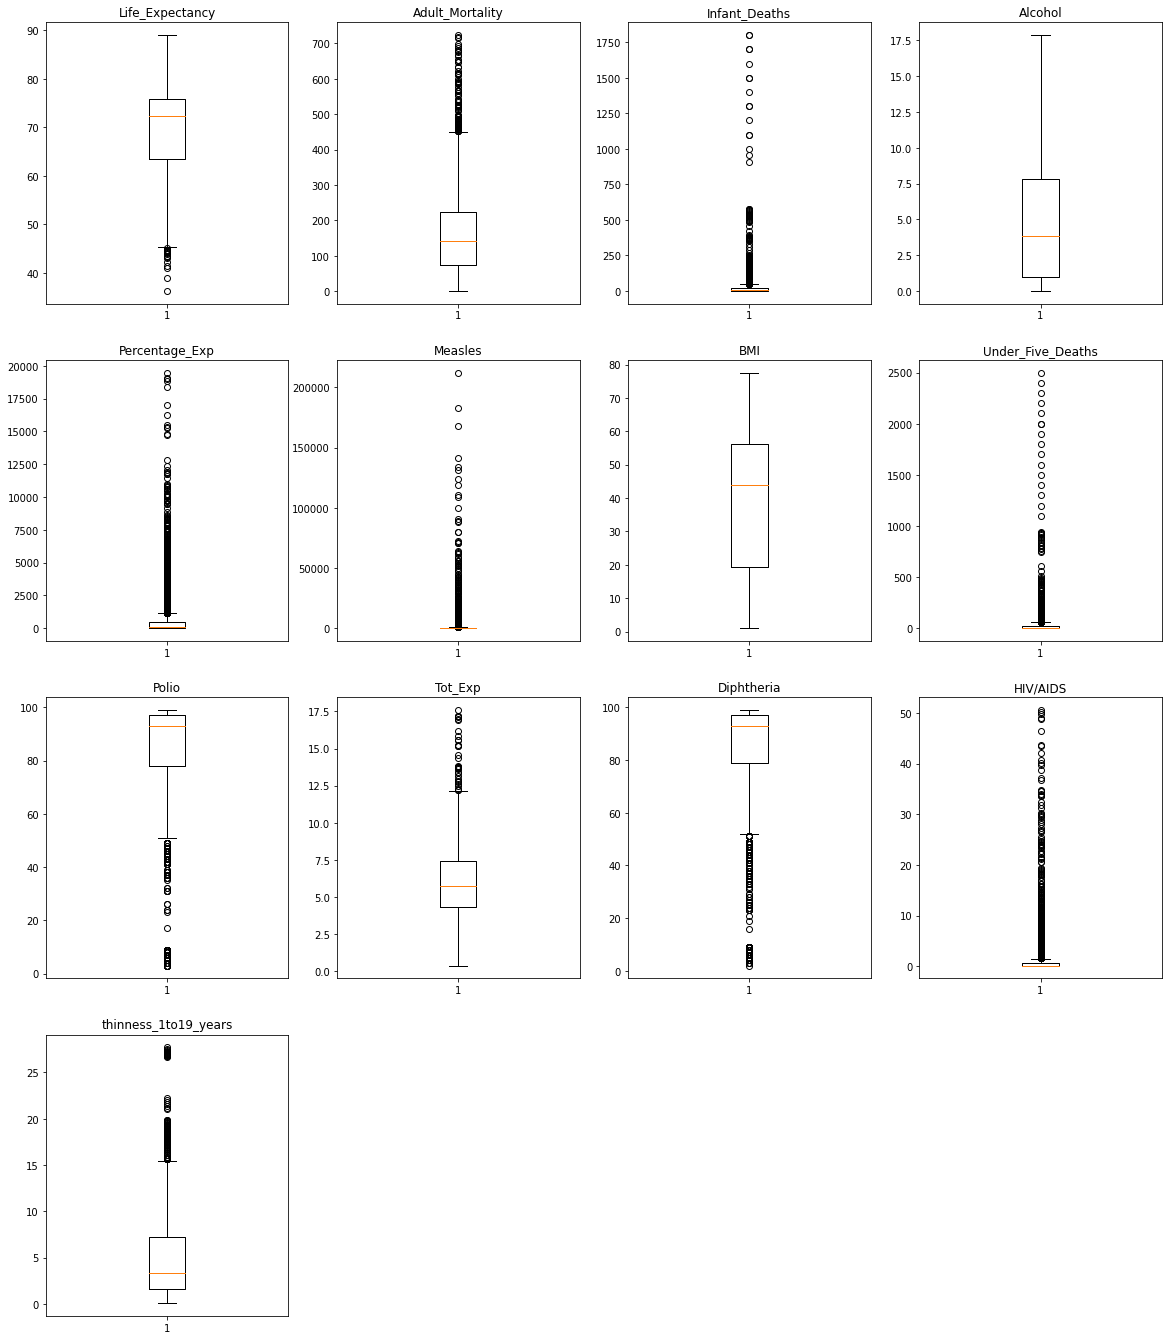

In [42]:
# Create a dictionary of columns.
col_dict = {'Life_Expectancy':1, 'Adult_Mortality':2,
            'Infant_Deaths':3, 'Alcohol':4,
            'Percentage_Exp':5,'Measles':6,
            'BMI':7,'Under_Five_Deaths':8,
            'Polio':9,'Tot_Exp':10,
            'Diphtheria':11,'HIV/AIDS':12,
            'thinness_1to19_years':13}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable])
                     plt.title(variable)

plt.show()

In [43]:
data.head()

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant_Deaths  Alcohol  Percentage_Exp  Measles   BMI  Under_Five_Deaths  \
0             62     0.01       71.279624     1154  19.1                 83   
1             64     0.01       73.523582      492  18.6                 86   
2             66     0.01       73.219243      430  18.1                 89   
3             69     0.01       78.184215     2787  17.6                 93   
4             71     0.01        7.097109     3013  17.2                 97   

   Polio  Tot_Exp  Diphtheria  HIV/AIDS  thinness_1to19_years  
0    6.0     8.16        65.0       0.1                  17.2  
1   58.0     8.18        62.0       0.1                  17.5  
2   62.0     8.13        64.0       0.1                  17.7  
3   67.0     8.52        67.0       0.1                  17.9  
4   68.0     7.87        68.0       0.1                  18.2

# **FEATURE SELECTION**

In [44]:
import scipy.stats as stats
stats.ttest_ind(data.loc[data['Status']=='Developed','Life_Expectancy'],data.loc[data['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=29.36614038467105, pvalue=6.432298335457971e-166)

**p value is < 0.05
Therefore, the difference of Life Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature.**

**Also "Adult mortality" : -0.7, "HIV/AIDS" : -0.56,  "BMI" : 0.57, "Polio" : 0.47, "GDP" : 0.46, "Alcohol" : 0.4, "thinness_1to19_years" : 0.45**

# **FEATURE ENGINEERING**

* **DUMMIFICATION OF STATUS**
* **NORMALIZING NUMERICAL FEATURES**

In [45]:
feature_df = data[['Country','Status','Adult_Mortality','Alcohol','HIV/AIDS','Polio','BMI', 'thinness_1to19_years','Life_Expectancy']]

In [46]:
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)

In [47]:
final['Adult_Mortality_scaled'] =final['Adult_Mortality'].apply(lambda x : ((x-np.min(final['Adult_Mortality']))/(np.max(final['Adult_Mortality'])-np.min(final['Adult_Mortality'])) * (20)))

In [48]:
final['Polio_scaled'] =final['Polio'].apply(lambda x : ((x-np.min(final['Polio']))/(np.max(final['Polio'])-np.min(final['Polio'])) * (20)))

In [49]:
final.to_csv('./final.csv',index = False) 

In [50]:
final = pd.read_csv('./final.csv')

In [51]:
final.head()

Country  Adult_Mortality  Alcohol  HIV/AIDS  Polio   BMI  \
0  Afghanistan            263.0     0.01       0.1    6.0  19.1   
1  Afghanistan            271.0     0.01       0.1   58.0  18.6   
2  Afghanistan            268.0     0.01       0.1   62.0  18.1   
3  Afghanistan            272.0     0.01       0.1   67.0  17.6   
4  Afghanistan            275.0     0.01       0.1   68.0  17.2   

   thinness_1to19_years  Life_Expectancy  Developing  Adult_Mortality_scaled  \
0                  17.2             65.0           1                7.257618   
1                  17.5             59.9           1                7.479224   
2                  17.7             59.9           1                7.396122   
3                  17.9             59.5           1                7.506925   
4                  18.2             59.2           1                7.590028   

   Polio_scaled  
0      0.625000  
1     11.458333  
2     12.291667  
3     13.333333  
4     13.541667

# **EMBED THE COUNTRY FEATURE**

In [52]:
countries = final.Country.unique()
country_dict = {'countries': list(countries)}
country_df = pd.DataFrame(country_dict)

In [53]:
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    return feature_layer(country_dict).numpy()

In [54]:
countries = feature_column.categorical_column_with_vocabulary_list(
 'countries', country_df['countries'])

In [55]:
countries_embedding = feature_column.embedding_column(countries, dimension=4)

In [56]:
countries_embedding =  demo(countries_embedding)

In [57]:
b = []
for embed in countries_embedding:
    b.extend([embed] * 16)

In [58]:
final['countries_embedding'] = pd.Series(b)

In [59]:
final['sum_countries_embedding'] = final['countries_embedding'].apply(lambda x: x.sum())

In [60]:
final =  final.rename(columns={"HIV/AIDS": "hivaids"})

In [61]:
feature_df = ['sum_countries_embedding','Adult_Mortality_scaled','Alcohol','hivaids','Polio_scaled','BMI', 'thinness_1to19_years','Developing']

# **TRAINING**

## **LINEAR REGRESSION**

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
x = final.loc[:,feature_df]
y = final.Life_Expectancy
model.fit(x, y)

LinearRegression()

In [63]:
print("Model slopes:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slopes:     [ 0.15761569 -0.92843921  0.20669099 -0.48772224  0.37506926  0.09398699
 -0.17083514 -3.66732492]
Model intercept: 67.4938346424481


In [64]:
y_predict = model.predict(x.values)
RMSE = np.sqrt(((y-y_predict)**2).values.mean())

results = pd.DataFrame()
results["Method"] = ["Linear Regression"]
results["RMSE"] = RMSE
results

Method      RMSE
0  Linear Regression  4.943823

In [65]:
np.min(final['Life_Expectancy']), np.max(final['Life_Expectancy'])

(36.3, 89.0)

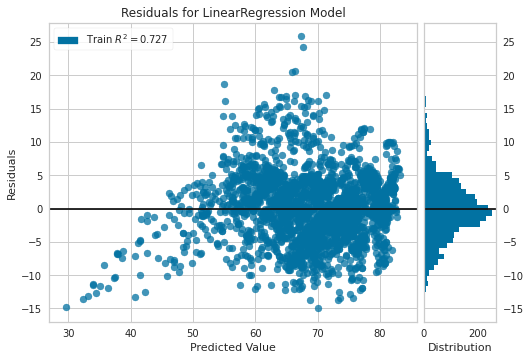

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(estimator = model)
visualizer.fit(x, y) 
visualizer.poof()

**Residuals should be pretty symmetrically distributed, tending to cluster towards the middle of the plot. Clustered around the lower single digits of the y-axis.
In general, no clear patterns.**

## **MIXED EFFECT MODEL**

In [67]:
#!pip install -q statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm("Life_Expectancy ~ Adult_Mortality_scaled + Alcohol + Polio_scaled + hivaids + BMI + thinness_1to19_years + Developing", 
                 final, 
                 groups=final["sum_countries_embedding"], re_formula="~Adult_Mortality_scaled + Alcohol + Polio_scaled + hivaids + BMI + thinness_1to19_years + Developing") 
#re_formula To ensure that each country has its own random slope

In [68]:
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 630.683943
  warnings.warn(msg, ConvergenceWarning)


                              Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             Life_Expectancy
No. Observations:             2864                Method:                         REML           
No. Groups:                   179                 Scale:                          2.8842         
Min. group size:              16                  Log-Likelihood:                 -7072.2854     
Max. group size:              16                  Converged:                      No             
Mean group size:              16.0                                                               
-------------------------------------------------------------------------------------------------
                                                   Coef.    Std.Err.    z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2711: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


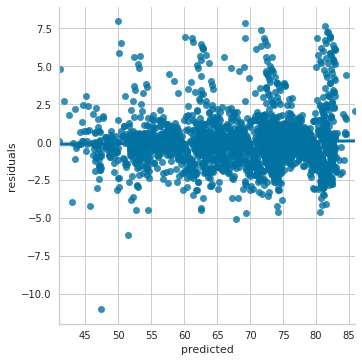

In [69]:
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)

In [70]:
y_predict = mdf.fittedvalues
RMSE = np.sqrt(((y-y_predict)**2).values.mean())
results.loc[3] = ["Mixed_Random_Slopes", RMSE]
results

Method      RMSE
0    Linear Regression  4.943823
3  Mixed_Random_Slopes  1.556047

# **USING A NEURAL NETWORK**

In [71]:
final = pd.read_csv('./final.csv')

In [72]:
final.head()

Country  Adult_Mortality  Alcohol  HIV/AIDS  Polio   BMI  \
0  Afghanistan            263.0     0.01       0.1    6.0  19.1   
1  Afghanistan            271.0     0.01       0.1   58.0  18.6   
2  Afghanistan            268.0     0.01       0.1   62.0  18.1   
3  Afghanistan            272.0     0.01       0.1   67.0  17.6   
4  Afghanistan            275.0     0.01       0.1   68.0  17.2   

   thinness_1to19_years  Life_Expectancy  Developing  Adult_Mortality_scaled  \
0                  17.2             65.0           1                7.257618   
1                  17.5             59.9           1                7.479224   
2                  17.7             59.9           1                7.396122   
3                  17.9             59.5           1                7.506925   
4                  18.2             59.2           1                7.590028   

   Polio_scaled  
0      0.625000  
1     11.458333  
2     12.291667  
3     13.333333  
4     13.541667

In [73]:
final['Status'] = final['Developing'].map(lambda x: 'Developing' if x==1 else 'Developed')

In [74]:
train, test = train_test_split(final, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

1832 train examples
459 validation examples
573 test examples


In [75]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('Life_Expectancy')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [76]:
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val, shuffle=False, batch_size=16)
test_ds = df_to_dataset(test, shuffle=False, batch_size=16)

In [77]:
final_batch = next(iter(train_ds))[0]

In [78]:
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    return feature_layer(final_batch).numpy()

In [79]:
feature_columns = []
# numeric cols
for header in ['Alcohol', 'HIV/AIDS', 'Polio_scaled','BMI','thinness_1to19_years']:
    feature_columns.append(feature_column.numeric_column(header))

In [80]:
#catgorical cols
status = feature_column.categorical_column_with_vocabulary_list(
      'Status', ['Developing', 'Developed'])

status = feature_column.indicator_column(status)
feature_columns.append(status)

In [81]:
# embedding columns
country = feature_column.categorical_column_with_vocabulary_list(
      'Country', final.Country.unique())
country_embedding = feature_column.embedding_column(country, dimension=6)
feature_columns.append(country_embedding)

In [82]:
#Input layer
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
#Model architecture
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'), 
  layers.Dense(16, activation='relu'), 
  layers.Dense(1)
])
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [83]:
#Fitting
history = model.fit(train_ds, validation_data=val_ds, epochs=40)

Epoch 1/40
58/58 [==============================] - 2s 16ms/step - loss: 2912.6898 - root_mean_squared_error: 53.0321 - val_loss: 171.0300 - val_root_mean_squared_error: 13.0778
Epoch 2/40
58/58 [==============================] - 0s 4ms/step - loss: 149.0394 - root_mean_squared_error: 12.1691 - val_loss: 90.5093 - val_root_mean_squared_error: 9.5136
Epoch 3/40
58/58 [==============================] - 0s 4ms/step - loss: 97.4747 - root_mean_squared_error: 9.8705 - val_loss: 77.4235 - val_root_mean_squared_error: 8.7991
Epoch 4/40
58/58 [==============================] - 0s 4ms/step - loss: 73.7637 - root_mean_squared_error: 8.5837 - val_loss: 65.2425 - val_root_mean_squared_error: 8.0773
Epoch 5/40
58/58 [==============================] - 0s 4ms/step - loss: 67.0981 - root_mean_squared_error: 8.1838 - val_loss: 51.8145 - val_root_mean_squared_error: 7.1982
Epoch 6/40
58/58 [==============================] - 0s 4ms/step - loss: 47.9554 - root_mean_squared_error: 6.9225 - val_loss: 45.382

In [84]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  root_mean_squared_error   val_loss  val_root_mean_squared_error  \
35  5.762866                 2.400597  12.352845                     3.514662   
36  6.228776                 2.495752  10.820253                     3.289415   
37  6.083138                 2.466402  10.902196                     3.301847   
38  5.920846                 2.433279  10.557143                     3.249176   
39  5.522215                 2.349939  10.685758                     3.268908   

    epoch  
35     35  
36     36  
37     37  
38     38  
39     39

In [85]:
predictions = model.predict(test_ds)
y = np.concatenate([y for x, y in test_ds], axis=0)

In [86]:
compare = pd.DataFrame({'predictions':predictions.reshape((-1,)), 'True': y})
compare.tail()

predictions  True
568    65.390266  64.5
569    66.062790  59.2
570    73.869949  73.3
571    71.569748  78.0
572    78.504097  77.0

In [87]:
model_err = model.evaluate(test_ds)

36/36 [==============================] - 0s 1ms/step - loss: 9.8171 - root_mean_squared_error: 3.1332


## **IN THIS PARTICULAR CASE, THE MIXED EFFECT MODEL IS SUPERIOR TO BOTH NORMAL LINEAR REGRESSION AND THE USED NEURAL NETWORK ARCHITECTURE, SINCE IT TAKES INTO ACCOUNT THE DEPENDANCE OF THE DATA.**